In [1]:
import MOW
import matplotlib.pyplot as plt
ga = 1.4
ga1p = ga + 1.0
ga1m = ga - 1.0
gar = ga1m / ga1p

In [2]:
dtheta = 1.0
dx = 0.12
dy = 1.0
nwave = 7
nu0 = 7.0

Text(0, 0.5, '$y$')

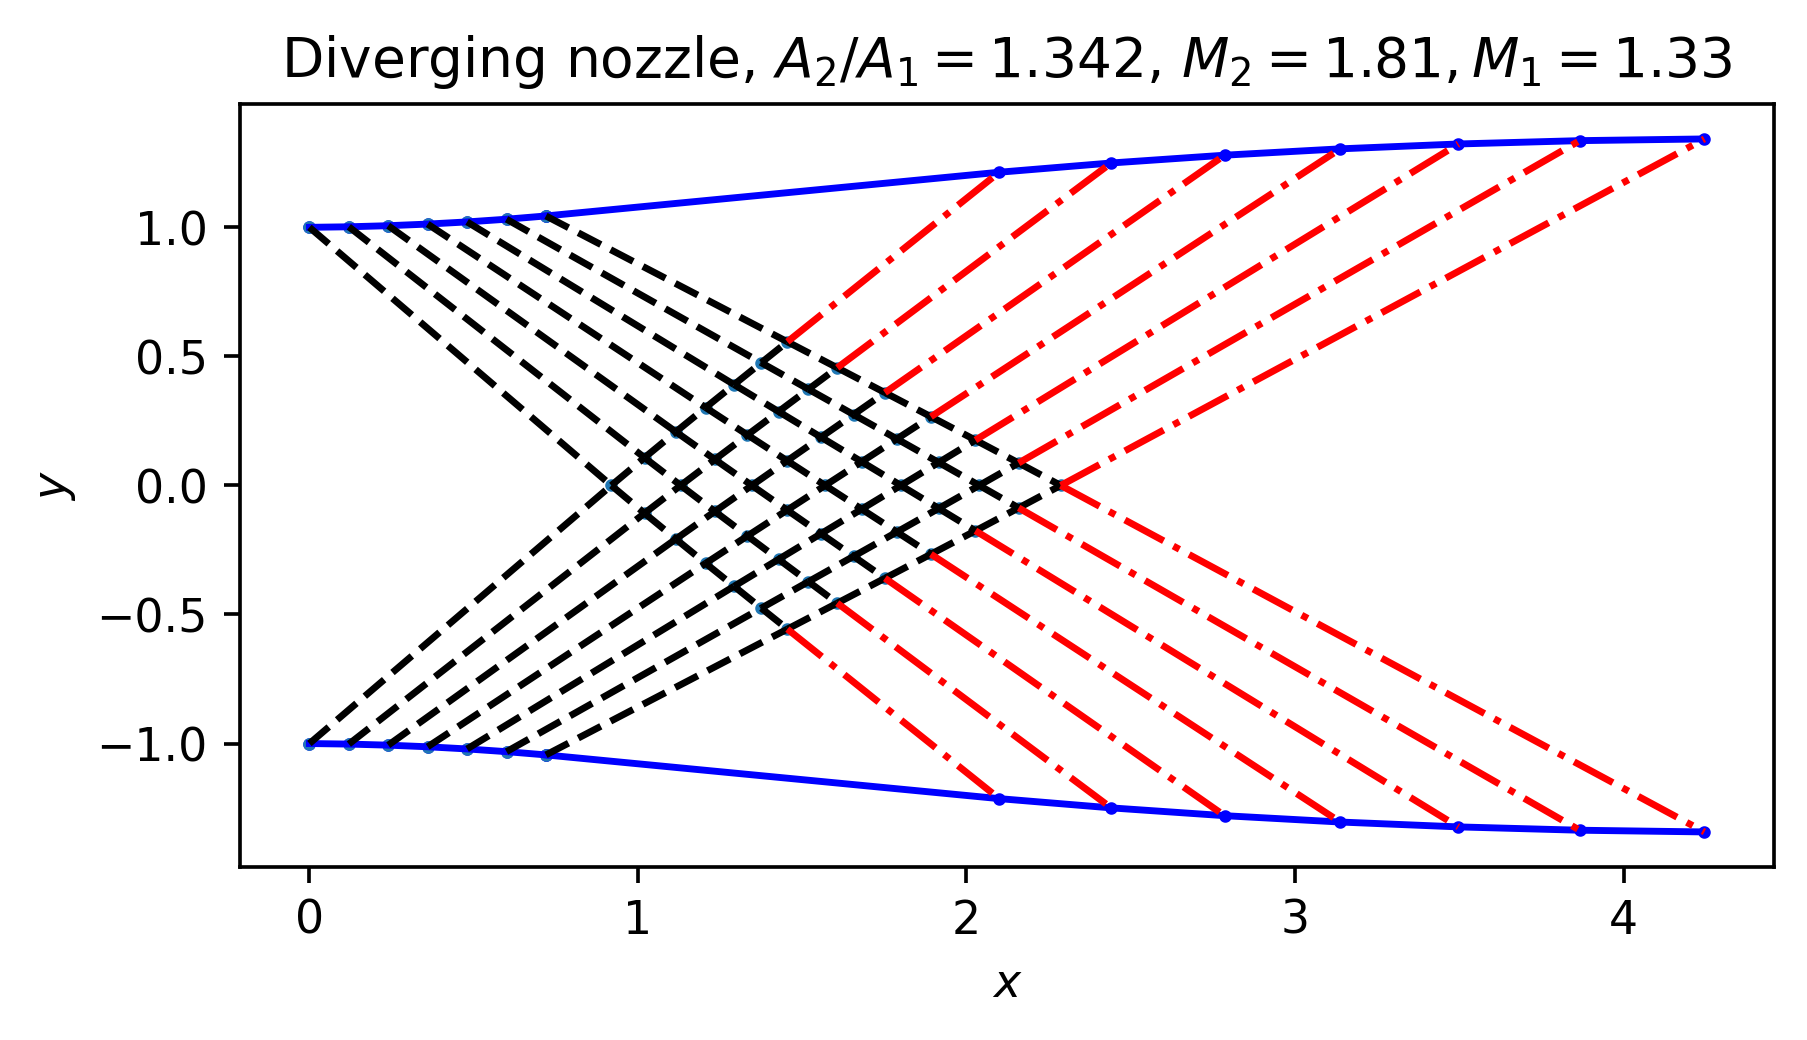

In [3]:
fig = plt.figure(figsize = (6,3), dpi = 330)


s_ = 3
noz = MOW.nozzle(dtheta, dx, dy, nwave, nu0 = nu0)
noz.march()
noz.elimination()
A2_A1 = noz.comp_yu[-1] / noz.node_y[1,0]

M2 = noz.calc_Ma(nu0 + nwave * 2 * dtheta)
M1 = noz.calc_Ma(nu0)

plt.title("Diverging nozzle, $A_2/A_1 = {:.3f}$, \
$M_2={:.2f}, M_1={:.2f}$".format(A2_A1, M2, M1))


plt.scatter(noz.node_x[1:, 0], noz.node_y[1:, 0], c = "blue", s = s_)
plt.scatter(noz.node_x[0, 1:], noz.node_y[0, 1:], c = "blue", s = s_)
plt.plot(noz.node_x[1:, 0], noz.node_y[1:, 0], c = "blue", linestyle = "solid")
plt.plot(noz.node_x[0, 1:], noz.node_y[0, 1:], c = "blue", linestyle = "solid")

plt.scatter(noz.comp_xu, noz.comp_yu, c = "blue", linestyle = "solid", s = s_)
plt.scatter(noz.comp_xl, noz.comp_yl, c = "blue", linestyle = "solid", s = s_)
plt.plot(noz.comp_xu, noz.comp_yu, c = "blue", linestyle = "solid")
plt.plot(noz.comp_xl, noz.comp_yl, c = "blue", linestyle = "solid")

noz.node_x[0,0] = None
noz.node_y[0,0] = None
plt.scatter(noz.node_x, noz.node_y, s = s_)

for i in range(1, noz.nwave+1):
    for j in range(1, noz.nwave+1):
        p1, p2 = noz.find_parent(i,j)
        plt.plot([noz.node_x[p1[0], p1[1]], noz.node_x[i,j]], [noz.node_y[p1[0], p1[1]], noz.node_y[i,j]], c = "k", linestyle = "dashed")
        plt.plot([noz.node_x[p2[0], p2[1]], noz.node_x[i,j]], [noz.node_y[p2[0], p2[1]], noz.node_y[i,j]], c = "k", linestyle = "dashed")

for i in range(1, noz.nwave+1):
    plt.plot([noz.node_x[noz.nwave, i], noz.comp_xu[i]],[noz.node_y[noz.nwave, i], noz.comp_yu[i]] , c = "red", linestyle = "dashdot")
    plt.plot([noz.node_x[i, noz.nwave], noz.comp_xl[i]],[noz.node_y[i, noz.nwave], noz.comp_yl[i]] , c = "red", linestyle = "dashdot")

plt.xlabel("$x$")
plt.ylabel("$y$")

In [5]:
def A2AStar(M):
    return 1.0 / M * (2.0 / ga1p + gar * M**2) **(0.5 / gar)

In [6]:
print(noz.node_y[1,0])
print(noz.comp_yu[-1])
M2 = noz.calc_Ma(nu0 + nwave * 2 * dtheta)
M1 = noz.calc_Ma(nu0)

print(A2AStar(M2) / A2AStar(M1))

1.0
1.3424806184736426
1.3425618537873107
